In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Data Import

In [2]:
features_df = pd.read_csv("data/Features_data_set.csv")
sales_df = pd.read_csv("data/sales_data_set.csv")
stores_df = pd.read_csv("data/stores_data_set.csv")

In [3]:
# convert date column to pandas datetime format
features_df["Date"] = pd.to_datetime(features_df["Date"], format="%d/%m/%Y")
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%d/%m/%Y")

In [4]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
num_feature_samples, num_features = features_df.shape
num_sale_samples, num_sale_features = sales_df.shape
num_stores_samples, num_stores_features = stores_df.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


# Create Final Dataset

## Combine Data to one Dataframe

In [8]:
tmp_df = pd.merge(sales_df, features_df, on=["Store", "Date", "IsHoliday"], how="left")
data_df = pd.merge(stores_df, tmp_df, on=["Store"], how="left")

In [9]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [10]:
num_samples, num_features = data_df.shape
print(f"The combined dataframe has {num_samples} samples and each sample has {num_features} features.")

The combined dataframe has 421570 samples and each sample has 16 features.


Check new dataframe for null values.

In [11]:
for col in data_df.columns:
    count_null = data_df[col].isnull().sum()
    print(f"The column {col} has {count_null} null values.")

The column Store has 0 null values.
The column Type has 0 null values.
The column Size has 0 null values.
The column Dept has 0 null values.
The column Date has 0 null values.
The column Weekly_Sales has 0 null values.
The column IsHoliday has 0 null values.
The column Temperature has 0 null values.
The column Fuel_Price has 0 null values.
The column MarkDown1 has 270889 null values.
The column MarkDown2 has 310322 null values.
The column MarkDown3 has 284479 null values.
The column MarkDown4 has 286603 null values.
The column MarkDown5 has 270138 null values.
The column CPI has 0 null values.
The column Unemployment has 0 null values.


## Convert Column IsHoliday from boolean to integer

In [12]:
data_df["IsHoliday"] = data_df["IsHoliday"].astype(int)

In [13]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [14]:
data_df.dtypes

Store                    int64
Type                    object
Size                     int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
dtype: object

## Convert Type Column to categorical
<br>
There are three types of stores available: A, B and C
<br>
Type A shall be converted to 0, Type B to 1 and Type C to 2

In [15]:
def convert_store_type(df):
    df_copy = df.copy()
    df_copy.loc[df_copy["Type"] == "A", "Type"] = 0
    df_copy.loc[df_copy["Type"] == "B", "Type"] = 1
    df_copy.loc[df_copy["Type"] == "C", "Type"] = 2
    df_copy["Type"] = df_copy["Type"].astype(int)
    return df_copy

In [16]:
data_df = convert_store_type(data_df)

In [17]:
data_df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,0,151315,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,0,151315,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,0,151315,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,0,151315,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,0,151315,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## Convert the Date Column to Seperate Features
Each date shall be converted to year and weekofyear categorical values.
Use WeekOfYear, because the final model should be able to predict the weekly sales for a given week.

In [18]:
data_df_copy = data_df
data_df_copy["Year"] = data_df_copy.Date.dt.year
data_df_copy["Week_of_Year"] = data_df_copy.Date.dt.weekofyear
# convert year, month and day to categorical values
data_df_converted = pd.get_dummies(data_df_copy, columns=["Year", "Week_of_Year"])

# remove column Date
data_df_converted.drop("Date", axis=1, inplace=True)

In [19]:
data_df_converted.head()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
0,1,0,151315,1,24924.50,0,42.31,2.572,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1,0,151315,1,46039.49,1,38.51,2.548,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1,0,151315,1,41595.55,0,39.93,2.514,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1,0,151315,1,19403.54,0,46.63,2.561,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1,0,151315,1,21827.90,0,46.50,2.625,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data_df_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            421570 non-null  int64  
 1   Type             421570 non-null  int64  
 2   Size             421570 non-null  int64  
 3   Dept             421570 non-null  int64  
 4   Weekly_Sales     421570 non-null  float64
 5   IsHoliday        421570 non-null  int64  
 6   Temperature      421570 non-null  float64
 7   Fuel_Price       421570 non-null  float64
 8   MarkDown1        150681 non-null  float64
 9   MarkDown2        111248 non-null  float64
 10  MarkDown3        137091 non-null  float64
 11  MarkDown4        134967 non-null  float64
 12  MarkDown5        151432 non-null  float64
 13  CPI              421570 non-null  float64
 14  Unemployment     421570 non-null  float64
 15  Year_2010        421570 non-null  uint8  
 16  Year_2011        421570 non-null  uint

In [21]:
num_samples, num_features = data_df_converted.shape
print(f"The converted dataframe has {num_samples} samples and each sample has {num_features} features.")

The converted dataframe has 421570 samples and each sample has 70 features.


## Use the Iterative Imputer from Sklearn to Remove Missing Data
<br>
Cited from Scikit-Learn Documentation: <br><br>

> *IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.*

Use only the training data in order to fit the imputer and for validation and test data, the imputer should only be used in order to transform the features. In that way, data leakage shall be avoided.

In [36]:
from sklearn.model_selection import train_test_split
# split into train and test sets
df_train, df_test = train_test_split(data_df_converted, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train, test_size=0.25, random_state=42)

In [37]:
print(f"Shape of training data: {df_train.shape}")
print(f"Shape of testing data: {df_test.shape}")
print(f"Shape of validation data: {df_val.shape}")

Shape of training data: (252942, 70)
Shape of testing data: (84314, 70)
Shape of validation data: (84314, 70)


In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=20, random_state=42, verbose=1)
imputer = imputer.fit(df_train[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (252942, 5)
[IterativeImputer] Change: 6337.646094337122, scaled tolerance: 141.63061 
[IterativeImputer] Change: 487.97246076327383, scaled tolerance: 141.63061 
[IterativeImputer] Change: 190.45031858774587, scaled tolerance: 141.63061 
[IterativeImputer] Change: 130.10553216371954, scaled tolerance: 141.63061 
[IterativeImputer] Early stopping criterion reached.


In [41]:
df_train_imputed = imputer.transform(df_train[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_test_imputed = imputer.transform(df_test[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])
df_val_imputed = imputer.transform(df_val[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]])

[IterativeImputer] Completing matrix with shape (252942, 5)
[IterativeImputer] Completing matrix with shape (84314, 5)
[IterativeImputer] Completing matrix with shape (84314, 5)


In [42]:
def add_new_markdown_cols(df_orig, data_df_imputed):
    df_new = df_orig.copy()
    df_new["MarkDown1"] = data_df_imputed[:, 0]
    df_new["MarkDown2"] = data_df_imputed[:, 1]
    df_new["MarkDown3"] = data_df_imputed[:, 2]
    df_new["MarkDown4"] = data_df_imputed[:, 3]
    df_new["MarkDown5"] = data_df_imputed[:, 4]
    
    return df_new

In [44]:
# add new MarkDown data to dataframe
df_train = add_new_markdown_cols(df_train, df_train_imputed)
df_val = add_new_markdown_cols(df_val, df_val_imputed)
df_test = add_new_markdown_cols(df_test, df_test_imputed)

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252942 entries, 360312 to 347323
Data columns (total 70 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Store            252942 non-null  int64  
 1   Type             252942 non-null  int64  
 2   Size             252942 non-null  int64  
 3   Dept             252942 non-null  int64  
 4   Weekly_Sales     252942 non-null  float64
 5   IsHoliday        252942 non-null  int64  
 6   Temperature      252942 non-null  float64
 7   Fuel_Price       252942 non-null  float64
 8   MarkDown1        252942 non-null  float64
 9   MarkDown2        252942 non-null  float64
 10  MarkDown3        252942 non-null  float64
 11  MarkDown4        252942 non-null  float64
 12  MarkDown5        252942 non-null  float64
 13  CPI              252942 non-null  float64
 14  Unemployment     252942 non-null  float64
 15  Year_2010        252942 non-null  uint8  
 16  Year_2011        252942 non-null 

In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84314 entries, 272342 to 189348
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            84314 non-null  int64  
 1   Type             84314 non-null  int64  
 2   Size             84314 non-null  int64  
 3   Dept             84314 non-null  int64  
 4   Weekly_Sales     84314 non-null  float64
 5   IsHoliday        84314 non-null  int64  
 6   Temperature      84314 non-null  float64
 7   Fuel_Price       84314 non-null  float64
 8   MarkDown1        84314 non-null  float64
 9   MarkDown2        84314 non-null  float64
 10  MarkDown3        84314 non-null  float64
 11  MarkDown4        84314 non-null  float64
 12  MarkDown5        84314 non-null  float64
 13  CPI              84314 non-null  float64
 14  Unemployment     84314 non-null  float64
 15  Year_2010        84314 non-null  uint8  
 16  Year_2011        84314 non-null  uint8  
 17  Year_2

In [48]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84314 entries, 235416 to 156375
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Store            84314 non-null  int64  
 1   Type             84314 non-null  int64  
 2   Size             84314 non-null  int64  
 3   Dept             84314 non-null  int64  
 4   Weekly_Sales     84314 non-null  float64
 5   IsHoliday        84314 non-null  int64  
 6   Temperature      84314 non-null  float64
 7   Fuel_Price       84314 non-null  float64
 8   MarkDown1        84314 non-null  float64
 9   MarkDown2        84314 non-null  float64
 10  MarkDown3        84314 non-null  float64
 11  MarkDown4        84314 non-null  float64
 12  MarkDown5        84314 non-null  float64
 13  CPI              84314 non-null  float64
 14  Unemployment     84314 non-null  float64
 15  Year_2010        84314 non-null  uint8  
 16  Year_2011        84314 non-null  uint8  
 17  Year_2

In [49]:
df_train.describe()

,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Week_of_Year_43,Week_of_Year_44,Week_of_Year_45,Week_of_Year_46,Week_of_Year_47,Week_of_Year_48,Week_of_Year_49,Week_of_Year_50,Week_of_Year_51,Week_of_Year_52
count,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,...,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000,252942.000000
mean,22.214128,0.591661,136604.527927,44.338342,16003.692124,0.070344,60.089949,3.360261,7234.577262,3348.641587,...,0.021131,0.014019,0.013991,0.013817,0.014039,0.014055,0.014189,0.014248,0.014252,0.014126
std,12.775737,0.667230,61020.418729,30.505770,22661.918390,0.255727,18.452365,0.458874,4952.311589,4876.208502,...,0.143822,0.117569,0.117455,0.116733,0.117651,0.117716,0.118270,0.118513,0.118529,0.118010
min,1.000000,0.000000,34875.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.270000,-265.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,93638.000000,18.000000,2083.000000,0.000000,46.700000,2.931000,7234.577262,3313.701717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.000000,140167.000000,38.000000,7623.635000,0.000000,62.090000,3.452000,7234.577262,3348.641587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,1.000000,202505.000000,74.000000,20235.330000,0.000000,74.290000,3.737000,7234.577262,3348.641587,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.000000,2.000000,219622.000000,99.000000,627962.930000,1.000000,100.140000,4.468000,88646.760000,104519.540000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Split Data into X and Y
X: Numpy array of features with shape (n_samples, n_features) <br>
Y: Numpy array of target with shape (n_samples,)

In [50]:
def get_X_and_Y(df):
    df_copy = df.copy()
    X = df_copy.drop("Weekly_Sales", axis=1, inplace=False).to_numpy()
    Y = df_copy["Weekly_Sales"].to_numpy()
    
    return X, Y

In [51]:
features_list = list(df_train.drop("Weekly_Sales", axis=1, inplace=False).columns)
X_train, Y_train = get_X_and_Y(df_train)
X_val, Y_val = get_X_and_Y(df_val)
X_test, Y_test = get_X_and_Y(df_test)

In [52]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of Y_val: {Y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")
print(features_list)

Shape of X_train: (252942, 69)
Shape of Y_train: (252942,)
Shape of X_val: (84314, 69)
Shape of Y_val: (84314,)
Shape of X_test: (84314, 69)
Shape of Y_test: (84314,)
['Store', 'Type', 'Size', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Year_2010', 'Year_2011', 'Year_2012', 'Week_of_Year_1', 'Week_of_Year_2', 'Week_of_Year_3', 'Week_of_Year_4', 'Week_of_Year_5', 'Week_of_Year_6', 'Week_of_Year_7', 'Week_of_Year_8', 'Week_of_Year_9', 'Week_of_Year_10', 'Week_of_Year_11', 'Week_of_Year_12', 'Week_of_Year_13', 'Week_of_Year_14', 'Week_of_Year_15', 'Week_of_Year_16', 'Week_of_Year_17', 'Week_of_Year_18', 'Week_of_Year_19', 'Week_of_Year_20', 'Week_of_Year_21', 'Week_of_Year_22', 'Week_of_Year_23', 'Week_of_Year_24', 'Week_of_Year_25', 'Week_of_Year_26', 'Week_of_Year_27', 'Week_of_Year_28', 'Week_of_Year_29', 'Week_of_Year_30', 'Week_of_Year_31', 'Week_of_Year_32', 'Week_of_Year_33', 'Week_of_Yea

## Check Features for Importance on Target

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [54]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
    print(f'Feature {features_list[i]}: {fs.scores_[i]}')

Feature Store: 1853.3837021347429
Feature Type: 8777.839814473042
Feature Size: 16118.348216379289
Feature Dept: 5740.94786228829
Feature IsHoliday: 34.64104165205094
Feature Temperature: 1.2255620935904257
Feature Fuel_Price: 0.280862696726409
Feature MarkDown1: 735.3606497451206
Feature MarkDown2: 44.54340959530391
Feature MarkDown3: 212.22682175825022
Feature MarkDown4: 430.91483463239825
Feature MarkDown5: 820.0276344820115
Feature CPI: 114.09115551779358
Feature Unemployment: 180.80733887976302
Feature Year_2010: 31.384294230424818
Feature Year_2011: 1.8751479251836094
Feature Year_2012: 18.715783008720763
Feature Week_of_Year_1: 9.20795248962591
Feature Week_of_Year_2: 30.189017758171424
Feature Week_of_Year_3: 34.415502658615615
Feature Week_of_Year_4: 45.031032863780226
Feature Week_of_Year_5: 0.17962626017977742
Feature Week_of_Year_6: 1.4752328665808703
Feature Week_of_Year_7: 1.2665852221286023
Feature Week_of_Year_8: 6.209757908811557
Feature Week_of_Year_9: 1.9363087769082

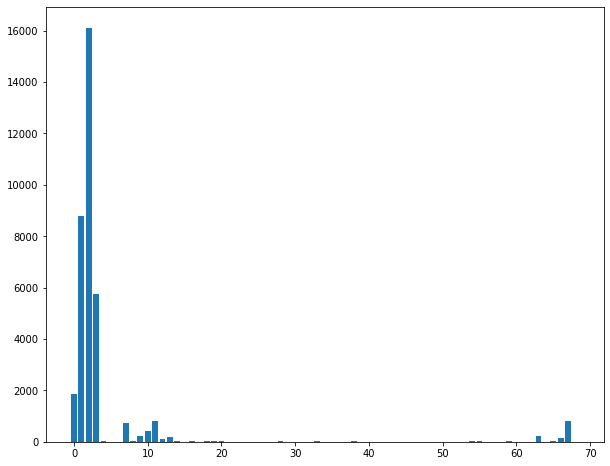

In [55]:
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

# Store Data in CSV Files for Training and Testing

In [56]:
def store_to_csv(X, Y, filename, path, store_target=True):
    '''
    This function takes to arrays (X and Y) as input and stores them as csv files.
    
    Args:
        X (np.ndarray): Sample data of shape (n_samples, n_features)
        Y (np.ndarray): Target data of shape (n_samples,)
        filename (string): The filename for the new csv file
        path (string): The path to the folder where the new csv file should be stored in
        store_target (boolean): Whether to also store the target variable in the csv file or not
    '''
    if not os.path.exists(path):
        os.makedirs(path)
    
    X_df = pd.DataFrame(X)
    
    if not store_target:
        pd.concat([X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    else:
        Y_df = pd.DataFrame(Y)
        pd.concat([Y_df, X_df], axis=1).to_csv(os.path.join(path, filename), header=False, index=False)
    
    print(f"The file {os.path.join(path, filename)} was created.")

In [57]:
store_to_csv(X_train, Y_train, "train.csv", "data_converted", True)
store_to_csv(X_test, None, "test.csv", "data_converted", False)
store_to_csv(X_test, Y_test, "test_with_true_label.csv", "data_converted", True)
store_to_csv(X_val, Y_val, "val.csv", "data_converted", True)

The file data_converted/train.csv was created.
The file data_converted/test.csv was created.
The file data_converted/test_with_true_label.csv was created.
The file data_converted/val.csv was created.


In [58]:
import csv
# store feature list as file for later usage
features_list_csv_filepath = "data_converted/features_list.csv"

with open(features_list_csv_filepath, "w+") as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(features_list)